### Exercício prático 06 - Ajuste de Curva 

In [1]:
import numpy as np
import math
from numpy.linalg import solve
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
class MQ:
  def __init__(self):
    self.alfas = []

  def fit_exp(self, x, y,printValues=False):
    self.alfas=[]
    z = np.log(y)# calcula o vetor z ln(y)
    # linearização
    self.fit(x, z, [lambda x:1, lambda x:x]) # calcula os valores de alfa com vetor z g1=1 e g2 = x
    self.alfas[0] = math.e**self.alfas[0] # calcula o a1

    if printValues:
      print("Valores do sistema linear Criado:")
      print(f"Alfas: {self.alfas}")

    self.alfas[1] = -self.alfas[1] # calcula o a2

  def fit(self,x,y,G,printValues=False):
    """método que calcula os valores deo vetor de alfas.\n
      Parâmetros:\n
      x= vetor de valores de xi tabelados\n
      y= vetor de valores de yi tabelados\n
      G= Vetor com as n funções g1(x),...gn(x), ex: [lambda x:1, lambda x:x,lambda x:x**2].\n\n 
      
      Retorno:\n
      calcula os valores de alfas
      printa os valores dos alfas calculados."""
    self.G=G
    A=[]
    B=[]
    j=0
    for g_lin in G:
      b=0
      for i in range(0,len(x)):
        b+=g_lin(x[i])*y[i]
      B.append(b)
      A.append([])
      for g_col in G:
        a=0
        for i in range(0,len(x)):
          a+=g_lin(x[i])*g_col(x[i])
        A[j].append(a)
      j+=1

    mat = np.append(A, np.array([B]).T,axis=1)
    #Valores do sistema linear Criado.
    self.alfas = solve(A, B)
    
    if printValues:
      print("Valores do sistema linear Criado:")
      print('A: ', A)
      print('B: ', B)
      print('Matriz:\n', mat)
      print(f"Alfas: {self.alfas}")

  def calc(self, x):
    """Calcula o somatório do valor de x aplicado em cada função vo vetor de funções g."""
    s = 0
    # print(self.alfas)
    for i in range(0,len(self.G)):
      s+=self.alfas[i]*self.G[i](x)
    return s
  
  def calc_exp(self, x):
    """retorna o valor da função phi no ponto x para casos não lineares."""
    # calculo da phi pra um ponto x
    return self.alfas[0]*(math.e**(-self.alfas[1]*x))
  
  def plotPontos(self,x,y):
    """Método que plota o gráfico dos pontos tabelados"""
    plt.plot(x, y,'ro')# plota como pontos
    plt.title('Gráfico dos pontos tabelados')

    plt.grid()
    plt.show()

  def PrintAjusteCurva(self,x,y,Linear=True,NaoLinear=False):
    """Método que mostra o gráfico do ajuste de curva.Os alfas já devem ter sido calculados com o método fit."""
    x_line = np.linspace(min(x)-0.0001, max(x)+0.0001, 100)

    if Linear:
      y_line = list(map(lambda x: self.calc(x), x_line))
      plt.plot(x_line,y_line,'g-',label= 'Função linear')
    plt.title('Gráfico Ajuste de Curva')
    if NaoLinear:
      self.fit_exp(x, y)
      y_nlinear = list(map(lambda x: self.calc_exp(x), x_line))
      plt.plot(x_line,y_nlinear,'b-',label= 'Função Não linear')
    plt.plot(x, y,'ro')# plota como pontos 
    plt.legend()
    plt.grid()
    plt.show()


In [3]:
def MinimoQuadrado(xi, yi):
  """Função que Calcula os valores do vetor de alfas com o mínimo Quadrado.\n
      Parâmetros:\n
      xi= vetor de valores de xi tabelados\n
      yi= vetor de valores de yi tabelados\n\n
      
      Retorno:\n
      Vetor a com os valores calculados 'alfas' por meio da resolução do sistema linear."""
  
  V = np.array([xi**2,xi**1,xi**0]).transpose()
  a = ((np.linalg.inv((V.transpose()).dot(V))).dot(V.transpose())).dot(yi)
    
  return a

### Exemplo 1 - Slide

In [4]:
x = np.array([-1.0, -0.75, -0.6,-0.5,-0.3, 0, 0.2, 0.4, 0.5,0.7, 1])
y = np.array([2.05, 1.153, 0.45,0.4,0.5, 0,	0.2, 0.6, 0.512, 1.2, 2.05])

### Duas formas de Calcular o valor do vetor alfa

#### Sem vetor de funções g e fora da classe

In [5]:
a=MinimoQuadrado(x,y)
print("Valor do vetor a: ",a)

Valor do vetor a:  [1.93775251 0.09695181 0.09141166]


####  Com o vetor de funções g e dentro da classe 

In [6]:
mq= MQ()
mq.fit(x, y, [lambda x:1, lambda x:x,lambda x:x**2],printValues=True)

Valores do sistema linear Criado:
A:  [[11, -0.34999999999999987, 4.2025], [-0.34999999999999987, 4.2025, -0.24987499999999985], [4.2025, -0.24987499999999985, 2.8464062500000002]]
B:  [9.115, -0.10874999999999968, 5.8755625]
Matriz:
 [[11.         -0.35        4.2025      9.115     ]
 [-0.35        4.2025     -0.249875   -0.10875   ]
 [ 4.2025     -0.249875    2.84640625  5.8755625 ]]
Alfas: [0.09141166 0.09695181 1.93775251]


#### Plotagem dos pontos Tabelados

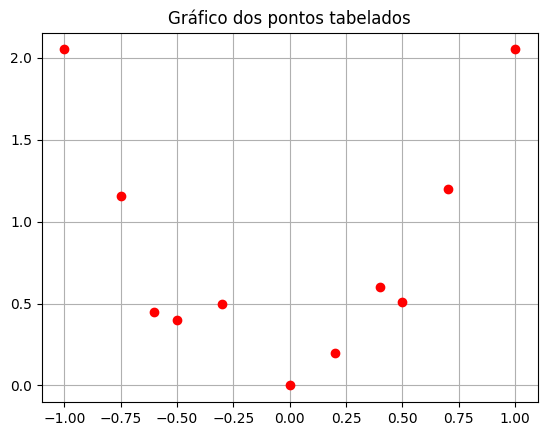

In [7]:
mq.plotPontos(x,y)

### Plotagem do gráfico do ajuste de curva

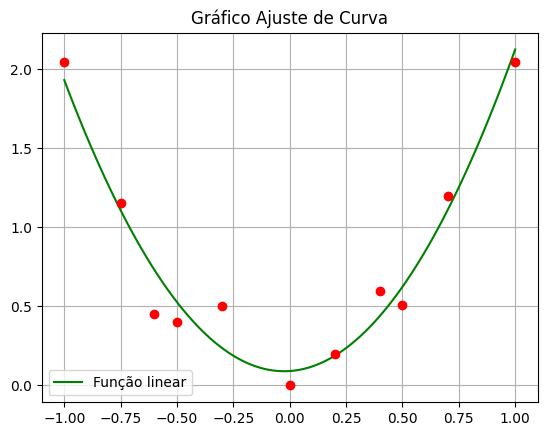

"\n    x_line = np.linspace(min(x)-0.0001, max(x)+0.0001, 100)\n    y_line = list(map(lambda x: self.calc(x), x_line))\n    plt.plot(x, y,'ro')# plota como pontos\n    plt.plot(x_line,y_line,'b-')\n    plt.title('Gráfico Ajuste de Curva')\n    plt.grid()\n    plt.show()\n\n"

In [8]:
mq.PrintAjusteCurva(x,y)

# mesmo que : 
"""
    x_line = np.linspace(min(x)-0.0001, max(x)+0.0001, 100)
    y_line = list(map(lambda x: self.calc(x), x_line))
    plt.plot(x, y,'ro')# plota como pontos
    plt.plot(x_line,y_line,'b-')
    plt.title('Gráfico Ajuste de Curva')
    plt.grid()
    plt.show()

"""

### Exemplo 2 - Slide - Funções não lineares

In [9]:
x  = np.array([-1.0, -0.7, -0.4,	-0.1,	0.2, 0.5, 0.8, 1.0])
y  = np.array([36.547, 17.264, 8.155, 3.852, 1.820, 0.860, 0.406, 0.246])

### plotagem dos Pontos Tabelados

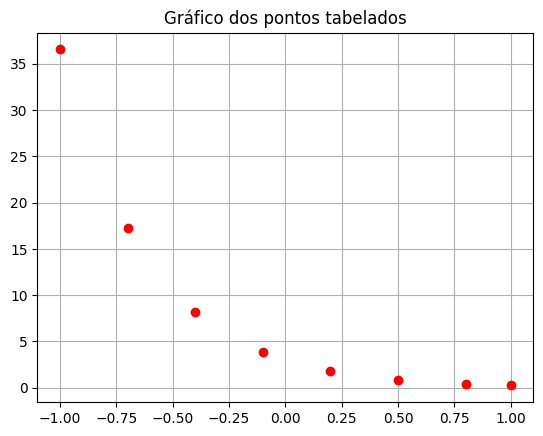

In [10]:
mq.plotPontos(x,y)

#### Valores de Alfa

In [11]:
mq.fit_exp(x,y,True)

Valores do sistema linear Criado:
Alfas: [ 2.99992322 -2.50019856]


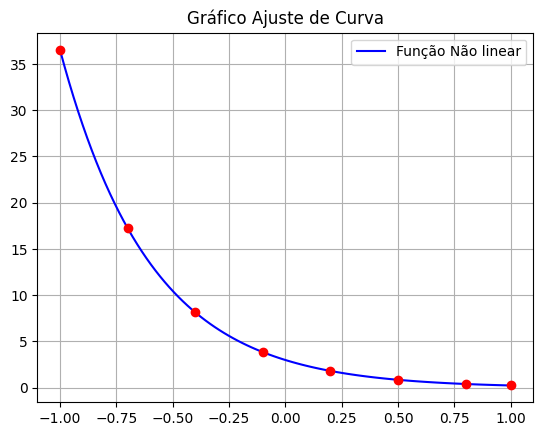

In [12]:
mq.PrintAjusteCurva(x,y,False,True)

# Exercício Prático 06 

 - Gerar 3 conjunto de dados (X e Y) com modelos diferentes (contendo pelo menos 1 polinomial e 1 não polinomial) 
 - Ajustar uma função que intuitivamente melhor descreve cada conjunto de dados gerados
 - Utilize um ajuste linear e um ajuste não linear para cada um dos 3 conjuntos
 - Plote o gráfico com os dados e a curva ajustada


#### 1° Conjunto de dados

In [13]:
blood_transfusion_uci_url= 'https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data'
df = pd.read_csv(blood_transfusion_uci_url)
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


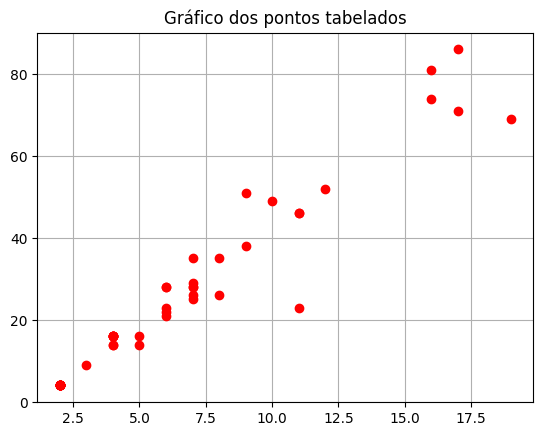

In [14]:
X = df['Frequency (times)'].values
Y = df['Time (months)'].values
mq= MQ()

mq.plotPontos(X[50:100],Y[50:100])

#### 2° Conjunto de dados

In [15]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url)
df

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


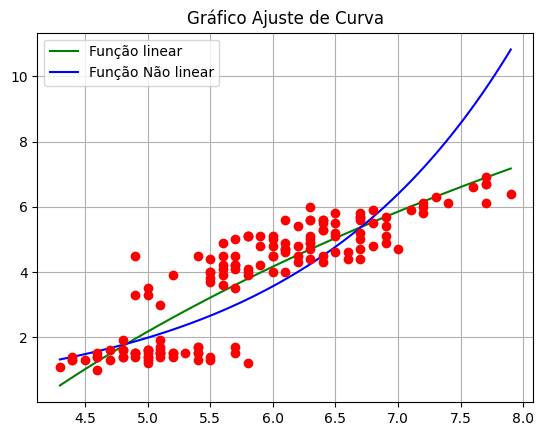

In [16]:
X = df['5.1'].values
Y = df['1.4'].values
mq= MQ()
mq.fit(X,Y,[lambda x:-np.log(x), lambda x:1])
mq.PrintAjusteCurva(X,Y,True,True)

#### 3° Conjunto de dados

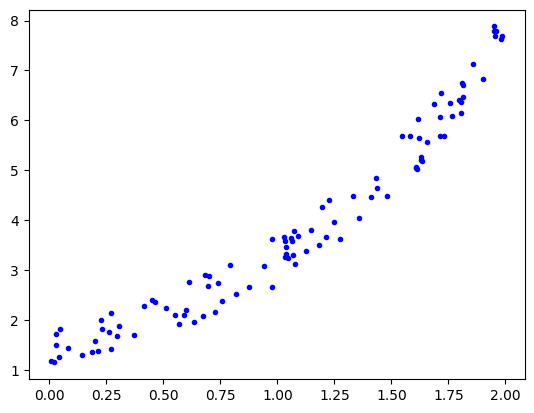

In [17]:
x = np.array([2*np.random.rand() for _ in range(100)])

y =np.array([np.exp(i) + np.random.rand() for i in x])

plt.plot(x, y, "b.")
plt.show()

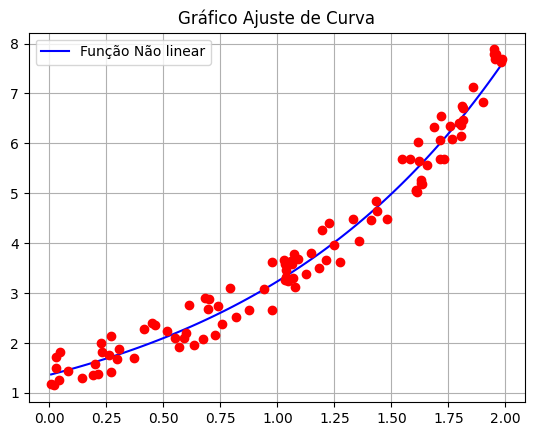

In [18]:
mq=MQ()
mq.fit(x,y,[lambda x:2*np.exp(x), lambda x: 2*x ])
mq.PrintAjusteCurva(x,y,False,True)